# Mnist
```
MNIST 데이터베이스 (Modified National Institute of Standards and Technology database)는 손으로 쓴 숫자들로 이루어진 대형 데이터베이스이며, 다양한 화상 처리 시스템을 트레이닝하기 위해 일반적으로 사용된다
```

In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
plt.style.use("ggplot")

In [26]:
mnistData = load_data()

In [27]:
mnistData

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [28]:
(x_train,y_train),(x_test,y_test) = mnistData

In [29]:
x_train.shape,x_test.shape,y_test.shape , y_test.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

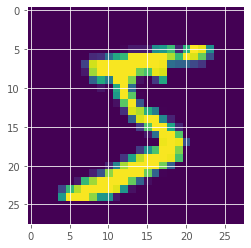

In [30]:
plt.imshow(x_train[0])   # [면, 행, 열]
plt.show()

In [31]:
y_train[0]

5

In [32]:
y_train  # y값을 인코딩해야함.

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [33]:
y_trainOne = to_categorical(y_train)
y_trainOne

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [34]:
x_train.shape

(60000, 28, 28)

In [35]:
x_trainM = x_train.reshape(60000,-1, )  # 2차원으로 변경
x_trainM.shape

(60000, 784)

In [36]:
model = Sequential()
model.add(Dense(units=64, input_dim = 784, activation='relu' )  )
model.add(Dense(units=32, input_dim = 64, activation='relu' )  )
model.add(Dense(units=10, input_dim = 32, activation='softmax' )  )

model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.fit(x_trainM, y_trainOne,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6398 - acc: 0.8066
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3621 - acc: 0.9046
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2578 - acc: 0.9284
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2119 - acc: 0.9413
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1875 - acc: 0.9477
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1582 - acc: 0.9553
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1434 - acc: 0.9590
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1361 - acc: 0.9619
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1205 - acc: 0.9656
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1150 - acc: 0.9674


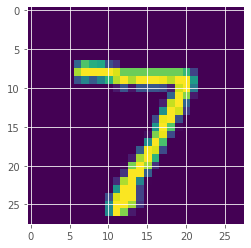

In [37]:
plt.imshow(x_test[0])

In [38]:
x_test[0].shape

(28, 28)

In [39]:
model.predict( x_test[0].reshape(1,-1)).argmax(axis=1) 

array([7], dtype=int64)

In [40]:
x_test.shape, y_test.shape     #  x_test를 수정해야함

((10000, 28, 28), (10000,))

In [41]:
y_test[0]

7

In [42]:
x_test.reshape(-1,28*28)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [43]:
x_test.reshape(-1,28*28).argmax(axis=1)

array([355,  97, 406, ..., 711, 464,  75], dtype=int64)

In [44]:
y_test = to_categorical(y_test)

In [45]:
model.evaluate(x_test.reshape(-1,28*28),y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1555 - acc: 0.9619


[0.15553271770477295, 0.961899995803833]

In [46]:
mnistData = load_data()

(x_train,y_train),(x_test,y_test) = mnistData

x_train.shape

(60000, 28, 28)


 # onehot인코딩 안하는 방법
 ## Flatten -> 1차원
 ## sparse_categorical_crossentropy

In [47]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(units=64,  activation='relu' )  )
model.add(Dense(units=32,  activation='relu' )  )
model.add(Dense(units=10,  activation='softmax' )  )

model.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.fit(x_train, y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8232 - acc: 0.5527
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6983 - acc: 0.7786
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3361 - acc: 0.9104
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2192 - acc: 0.9394
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1754 - acc: 0.9509
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1551 - acc: 0.9570
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1387 - acc: 0.9620
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1269 - acc: 0.9654
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1166 - acc: 0.9679
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1086 - acc: 0.9702


In [48]:
model.predict( x_test )

array([[7.99695325e-15, 3.71166279e-05, 1.45218901e-05, ...,
        9.99932408e-01, 2.21290075e-09, 7.02894340e-07],
       [3.47690908e-12, 9.57619886e-06, 9.99884367e-01, ...,
        1.05896666e-04, 1.34228425e-12, 6.49979785e-16],
       [8.68639750e-24, 9.99745071e-01, 1.33220732e-04, ...,
        1.19880642e-04, 1.74314050e-06, 1.28922539e-09],
       ...,
       [2.22765613e-13, 1.47938792e-07, 1.71086215e-10, ...,
        9.65961430e-04, 1.64680756e-07, 4.00251569e-03],
       [1.78815324e-10, 1.02645356e-06, 6.28767600e-25, ...,
        5.34168792e-14, 1.57235627e-05, 1.07649196e-08],
       [2.61486275e-04, 1.34416141e-11, 1.64712677e-04, ...,
        0.00000000e+00, 1.78495259e-06, 2.72282630e-11]], dtype=float32)

In [49]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [50]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [51]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [52]:
x_test[0].shape

(28, 28)

In [53]:
x_test[0].reshape(1,28,28).argmax(axis=1)

array([[ 0,  0,  0,  0,  0,  0,  8,  8,  8,  8,  8, 25,  9, 21,  9,  9,
         9, 15, 13, 12,  9,  9,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [54]:
model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)

array([7], dtype=int64)

In [55]:
model.predict(x_test).argmax(axis=1) # => x 전체 예측값

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [56]:
model.evaluate(x_test,y_test) # 손실, 정확도

313/313 [==============================] - 1s 2ms/step - loss: 0.1603 - acc: 0.9604


[0.16027680039405823, 0.9603999853134155]

# 텐서


In [57]:
mnistData = load_data()

(x_train,y_train),(x_test,y_test) = mnistData

x_train.shape

(60000, 28, 28)

In [58]:
x_trainM = x_train.reshape(60000, -1 )  
x_trainM.shape

(60000, 784)

In [59]:
y_trainOne = to_categorical(y_train)
y_trainOne

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [60]:
x_trainM = tf.cast(x_trainM, dtype=tf.float32)

In [61]:
y_train.shape

(60000,)

In [62]:
x_trainM.shape, y_trainOne.shape

(TensorShape([60000, 784]), (60000, 10))

In [63]:
# x = tf.constant(x_trainM, tf.float32)
# y= tf.constant(y_trainOne, tf.float32)

In [64]:
initX = tf.initializers.GlorotUniform()
w1 = tf.Variable(initX(shape=[784,64]))
b1 = tf.Variable(initX(shape = [64]))
w2 = tf.Variable( initX( shape=[64,32] ) )
b2 = tf.Variable( initX( shape=[32] ) )
w3 = tf.Variable( initX( shape=[32,10] ) ) #1은 남겨야 한다.
b3 = tf.Variable( initX( shape=[10] ) ) 

In [65]:
def compute_loss():
    z1 = tf.matmul( x_trainM, w1) + b1
    hx1 = tf.nn.relu( z1 ) 
    z2 = tf.matmul( hx1, w2 ) + b2
    hx2 = tf.nn.relu( z2 )
    z = tf.matmul( hx2, w3 ) + b3
    
    cost_i = tf.nn.softmax_cross_entropy_with_logits( logits=z, labels = y_trainOne)
    cost = tf.reduce_mean( cost_i)
    return cost

# 1000번이라 오래걸림

In [66]:
optimizer = Adam( learning_rate=0.01)
for i in range(1000):
    optimizer.minimize( compute_loss, var_list=[w1,w2,w3, b1,b2,b3])
    print( i, compute_loss().numpy() )

0 109.454414
1 113.82115
2 77.10857
3 71.939224
4 30.700792
5 23.994463
6 28.74915
7 22.82573
8 14.305456
9 11.033146
10 10.062037
11 8.669084
12 6.8359075
13 5.2763863
14 5.466232
15 5.0612288
16 3.6583922
17 2.6683338
18 2.3736427
19 2.3114307
20 2.2586224
21 2.2043417
22 2.1733117
23 2.171021
24 2.1797376
25 2.1887708
26 2.1927707
27 2.1932938
28 2.1956096
29 2.201675
30 2.2075598
31 2.2108588
32 2.211263
33 2.2091217
34 2.2048044
35 2.198547
36 2.1909714
37 2.1827345
38 2.1742563
39 2.1658835
40 2.1575782
41 2.1493607
42 2.1401951
43 2.1294181
44 2.1162295
45 2.1006927
46 2.0840914
47 2.0681477
48 2.053868
49 2.0412073
50 2.0290704
51 2.0169141
52 2.0046833
53 1.9931414
54 1.983037
55 1.9745214
56 1.9672155
57 1.9608018
58 1.9544669
59 1.9481974
60 1.9427509
61 1.9381398
62 1.9335558
63 1.9286094
64 1.923012
65 1.9165657
66 1.9096018
67 1.9024824
68 1.8949848
69 1.8873069
70 1.8790329
71 1.8705671
72 1.8620242
73 1.8531909
74 1.8440251
75 1.8343242
76 1.8240545
77 1.81354
78 1.8037

604 0.5844879
605 0.5831918
606 0.5818238
607 0.58053124
608 0.57927483
609 0.57789975
610 0.5766706
611 0.5754246
612 0.5742889
613 0.57297117
614 0.57178164
615 0.57059205
616 0.56931263
617 0.5681227
618 0.56692547
619 0.5656393
620 0.56452394
621 0.56322175
622 0.56209576
623 0.5608263
624 0.55963475
625 0.5584899
626 0.55723506
627 0.5560654
628 0.55481464
629 0.5536969
630 0.55245185
631 0.55136245
632 0.5502094
633 0.5491047
634 0.5478948
635 0.5467795
636 0.5455673
637 0.5444651
638 0.5433297
639 0.5422555
640 0.5411536
641 0.5400392
642 0.53897107
643 0.53787404
644 0.5368269
645 0.5357372
646 0.5347407
647 0.5336424
648 0.53260744
649 0.53155154
650 0.53056496
651 0.52955323
652 0.5285344
653 0.5274815
654 0.5264024
655 0.5254377
656 0.5243319
657 0.5233084
658 0.5223485
659 0.5213132
660 0.5203584
661 0.5193767
662 0.5184347
663 0.51750964
664 0.5165077
665 0.5156166
666 0.5147119
667 0.5138196
668 0.512894
669 0.5120605
670 0.5111555
671 0.5102018
672 0.50949216
673 0.50858

In [67]:
def hxfn(xdata):
    xd = tf.constant(xdata, tf.float32)
    z1 = tf.matmul(xd, w1)+b1
    hx1 = tf.nn.relu( z1 ) 
    z2 = tf.matmul( hx1, w2 ) + b2
    hx2 = tf.nn.relu( z2 )
    z = tf.matmul( hx2, w3 ) + b3
    hx = tf.nn.softmax(z)
    return(hx.numpy()>0.5) +0

In [68]:
pred = hxfn(x_trainM).argmax(axis = 1)

In [69]:
(pred ==y_train).mean()

0.9126

# ImageMake

In [71]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
plt.style.use('ggplot')

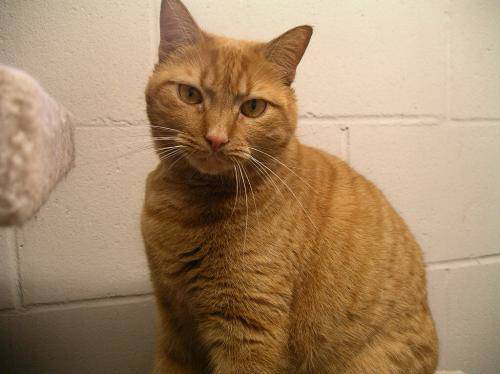

In [72]:
# 고양이사진
imgData = image.load_img('image/cat/cat1.jpg')
imgData

In [ ]:
type(imgData)

In [73]:
# rgb값 255로 스케일
dataGen = image.ImageDataGenerator(rescale=1./255)

In [75]:
trainGen= dataGen.flow_from_directory('image',target_size=(98,98))

Found 20 images belonging to 2 classes.


In [76]:
type(trainGen)

keras.preprocessing.image.DirectoryIterator

In [77]:
x_train,y_train = trainGen.next()

In [78]:
x_train.shape , y_train.shape

((20, 98, 98, 3), (20, 2))

In [79]:
x_train

array([[[[0.3019608 , 0.27450982, 0.20392159],
         [0.30980393, 0.28235295, 0.21176472],
         [0.3137255 , 0.28627452, 0.21568629],
         ...,
         [0.18431373, 0.16078432, 0.16078432],
         [0.18431373, 0.16078432, 0.16078432],
         [0.16862746, 0.14509805, 0.14509805]],

        [[0.2901961 , 0.2627451 , 0.19215688],
         [0.29411766, 0.26666668, 0.19607845],
         [0.29411766, 0.26666668, 0.19607845],
         ...,
         [0.25882354, 0.23529413, 0.23529413],
         [0.25490198, 0.23137257, 0.23137257],
         [0.20392159, 0.18039216, 0.18039216]],

        [[0.28235295, 0.25490198, 0.18431373],
         [0.28235295, 0.25490198, 0.18431373],
         [0.28235295, 0.25490198, 0.18431373],
         ...,
         [0.16078432, 0.13725491, 0.13725491],
         [0.1764706 , 0.15294118, 0.15294118],
         [0.19215688, 0.16862746, 0.16862746]],

        ...,

        [[0.5411765 , 0.46274513, 0.33333334],
         [0.52156866, 0.43529415, 0.34117648]

In [80]:
y_train #  oh 인코딩

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

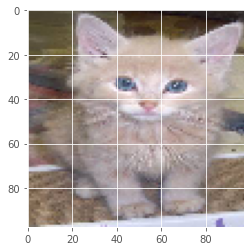

In [81]:
plt.imshow(x_train[0])

In [82]:
# 분류값 확인
trainGen.class_indices

{'cat': 0, 'dog': 1}

In [83]:
 x_train.reshape(20, -1)

array([[0.3019608 , 0.27450982, 0.20392159, ..., 0.7843138 , 0.7960785 ,
        0.9176471 ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.32156864, 0.36862746, 0.2901961 , ..., 0.37647063, 0.34117648,
        0.34509805],
       ...,
       [0.04705883, 0.03529412, 0.00784314, ..., 0.32941177, 0.65882355,
        0.7686275 ],
       [0.3372549 , 0.3137255 , 0.32156864, ..., 0.29803923, 0.29803923,
        0.32941177],
       [0.6901961 , 0.63529414, 0.58431375, ..., 0.8470589 , 0.6431373 ,
        0.54901963]], dtype=float32)

In [84]:
x_train.shape 

(20, 98, 98, 3)

In [85]:
# flatten 쓰면 인코딩 안해도됨. 3차원 데이터
model = Sequential()
model.add(Flatten(input_shape = (98,98,3)))
model.add(Dense(units=64,  activation='relu' )  )
model.add(Dense(units=32,  activation='relu' )  )
model.add(Dense(units=2,  activation='softmax' )  )

# model.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.compile( loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])
model.fit(x_train, y_train,epochs=50)
h = model.fit(x_train, y_train,epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 233ms/step - loss: 0.6582 - acc: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 5ms/step - loss: 15.5291 - acc: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 5ms/step - loss: 3.1655 - acc: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 5ms/step - loss: 0.9554 - acc: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 4ms/step - loss: 3.0902 - acc: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 1.8134 - acc: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 4ms/step - loss: 0.5414 - acc: 0.8000
Epoch 8/50
1/1 [==============================] - 0s 4ms/step - loss: 0.7137 - acc: 0.6500
Epoch 9/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2114 - acc: 0.9000
Epoch 10/50
1/1 [==============================] - 0s 4ms/step - loss: 0.3551 - acc: 0.8000
Epoch 11/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2192 - acc: 0

1/1 [==============================] - 0s 4ms/step - loss: 0.0023 - acc: 1.0000
Epoch 41/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0023 - acc: 1.0000
Epoch 42/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0023 - acc: 1.0000
Epoch 43/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0023 - acc: 1.0000
Epoch 44/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0022 - acc: 1.0000
Epoch 45/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0022 - acc: 1.0000
Epoch 46/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0022 - acc: 1.0000
Epoch 47/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0022 - acc: 1.0000
Epoch 48/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0021 - acc: 1.0000
Epoch 49/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0021 - acc: 1.0000
Epoch 50/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0021 - acc: 1.0000


In [128]:

model.save('catdog.h5')
# h5는 모델 압축 파일


# model.save("model.h5")
# print("Saved model to disk")

# 해당 코드가 

AttributeError: module 'h5py' has no attribute 'File'

# 연습

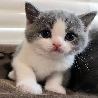

In [114]:
testImg = image.load_img('image/test.jpg',target_size=(98,98))
testImg

In [115]:
type(testImg)

PIL.Image.Image

In [116]:
imgArr = image.img_to_array(testImg) #  넘파이 배열로 만듦
imgArr = imgArr/255   #  스케일링

In [117]:
imgArr.shape

(98, 98, 3)

In [118]:
model.predict(imgArr.reshape(1,98,98,3)).argmax(axis=1)

array([1], dtype=int64)

In [119]:
# 피클 
import pickle
fp = open('catdog.history','wb')
pickle.dump(h.history,fp)
fp.close()

In [120]:
import shelve
sh = shelve.open('myhist')
sh['myh'] = h.history
sh.close()

In [122]:
def mydecode(arg):
    my= []
    
    for p,l in arg:
        if p>0.5:
            my.append((p,'강아지'))
        else:
            my.append((l,'고양이'))
    return my
            

In [123]:
# 모델 예측
pred = model.predict(imgArr.reshape(1,98,98,3))
pred

array([[5.4233667e-04, 9.9945766e-01]], dtype=float32)

In [124]:
# 해독 
def mydecode(arg):
    my= []
    
    for p,l in arg:
        if p>0.5:
            my.append((p,'강아지'))
        else:
            my.append((l,'고양이'))
    return my
            

In [125]:
# 고양이로 예측됨.
mydecode(pred)

[(0.99945766, '고양이')]

# 오류
 module 'h5py' has no attribute 'File'  = > h5py uninstall하고 다시 install